In [1]:
import os.path as osp
import os
import cv2
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
from typing import *

from utils import *

In [2]:
def inbox(point:tuple, bbox:list):
    x, y = tuple(point)
    x1, y1, x2, y2 = tuple(bbox)
    return x1 <= x <= x2 and y1 <= y <= y2

In [3]:
ann_path="/home/wzy/ultralytics/ann_1221"

In [38]:
ann_file="anns_2.json"
with open(osp.join(ann_path,ann_file),"r") as fp:
    anns=json.load(fp
        
    )

In [39]:
anns[0]

{'file_name': 'P0000_0022.png',
 'segmentation': [{'category': 'plane',
   'bbox': [310.0, 220.0, 464.0, 373.0],
   'segmentation': [360.0,
    345.5,
    359.0,
    345.5,
    358.0,
    345.5,
    357.0,
    345.5,
    356.5,
    345.0,
    356.0,
    344.5,
    355.0,
    344.5,
    354.0,
    344.5,
    353.5,
    344.0,
    353.0,
    343.5,
    352.0,
    343.5,
    351.5,
    343.0,
    351.0,
    342.5,
    350.0,
    342.5,
    349.0,
    342.5,
    348.5,
    342.0,
    348.0,
    341.5,
    347.0,
    341.5,
    346.5,
    341.0,
    346.5,
    340.0,
    346.0,
    339.5,
    345.5,
    339.0,
    345.0,
    338.5,
    344.0,
    338.5,
    343.0,
    338.5,
    342.5,
    338.0,
    342.0,
    337.5,
    341.5,
    338.0,
    341.0,
    338.5,
    340.0,
    338.5,
    339.0,
    338.5,
    338.5,
    339.0,
    338.0,
    339.5,
    337.0,
    339.5,
    336.5,
    339.0,
    336.0,
    338.5,
    335.0,
    338.5,
    334.0,
    338.5,
    333.5,
    338.0,
    333.0,
  

In [40]:
# id="P0190_0006"
# id="P0000_0001"
id="P0000_0022"

In [41]:
index=0
for num,ann in enumerate(anns):
    if ann["file_name"][:-4]==id:
        index=num
        break
ann=anns[index]

In [42]:
seg_lis=[]
for seg_dict in anns[index]["segmentation"]:
    seg_lis.append(seg_dict["segmentation"])
bbox_lis=[]
for seg_dict in anns[index]["segmentation"]:
    bbox_lis.append(seg_dict["bbox"])

In [43]:

segmentations=ann["segmentation"]
for segment in segmentations:
    bbox=segment["bbox"]
    seg=segment["segmentation"]
    if seg==None:
        segment["segmentation"]=box2ploy(bbox)
        continue
    new_seg=[]
    for i in range(0,len(seg),2):
        x=seg[i]
        y=seg[i+1]
        if inbox((x,y),bbox):
            new_seg.append([x,y])
        else:
            near_point=list(point_refine((x,y),bbox))
            if not near_point in new_seg:
                new_seg.append(near_point)
            # new_seg.append(list(find_near((x,y),bbox)))
    new_seg=np.array(new_seg).flatten().tolist()
    if len(new_seg)<4:
        new_seg=box2ploy(bbox)
    segment["segmentation"]=new_seg

In [44]:
seg_lis=[]
for seg_dict in ann["segmentation"]:
    seg_lis.append(seg_dict["segmentation"])
bbox_lis=[]
for seg_dict in ann["segmentation"]:
    bbox_lis.append(seg_dict["bbox"])

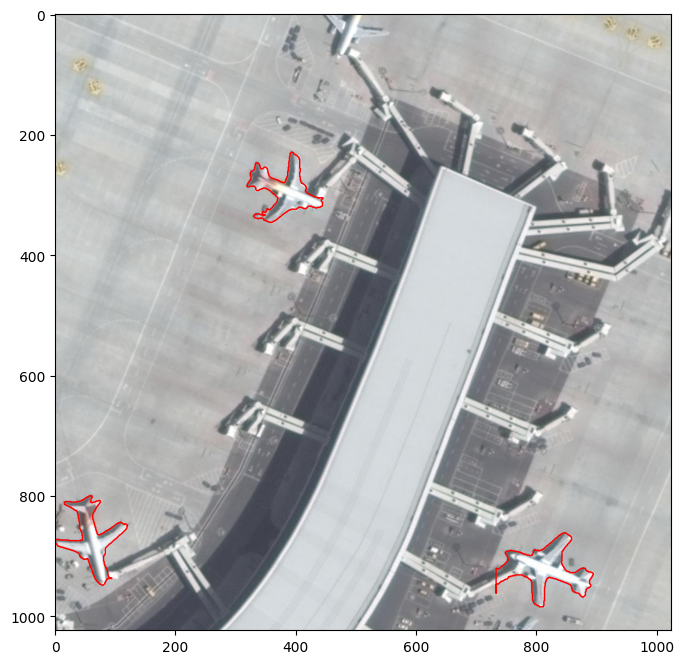

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


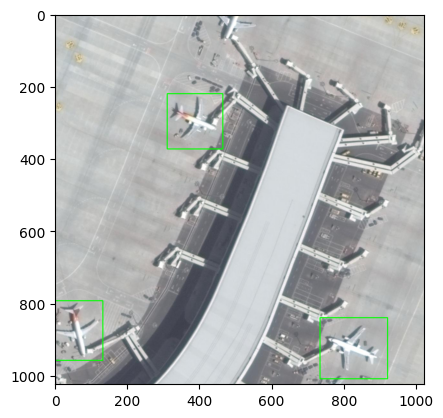

In [45]:
visualize_segmentation(data_path(id),seg_lis)
visualize_bbox(data_path(id),bbox_lis)


In [24]:
label_lis=get_label(id)

In [25]:
print(len(label_lis))
print(len(seg_lis))

70
70
